In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

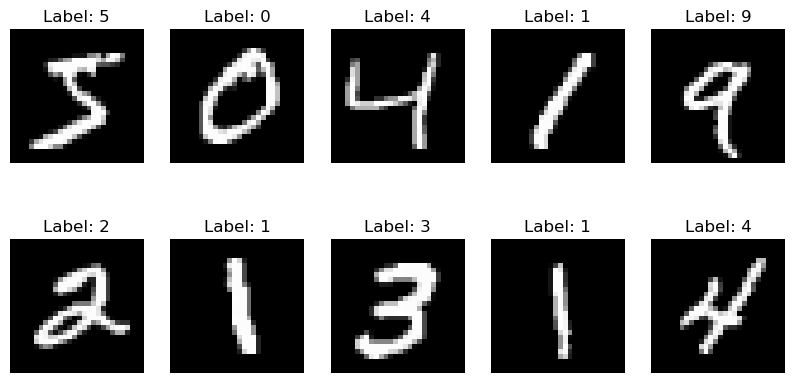

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
class AdaActActivation(layers.Layer):
    def __init__(self, **kwargs):
        super(AdaActActivation, self).__init__(**kwargs)
        self.k0 = self.add_weight(name='k0', shape=(1,), initializer='random_normal', trainable=True)
        self.k1 = self.add_weight(name='k1', shape=(1,), initializer='random_normal', trainable=True)

    def call(self, inputs):
        return self.k0 + self.k1 * inputs

In [9]:
model = models.Sequential([
    layers.Dense(128, activation=AdaActActivation(), input_shape=(28 * 28,)),
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100482    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,772
Trainable params: 101,772
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 50
batch_size = 128

In [12]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/50
469/469 [==============================] - 5s 7ms/step - loss: 0.6676 - accuracy: 0.8229 - val_loss: 0.3173 - val_accuracy: 0.9094
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3477 - accuracy: 0.9008 - val_loss: 0.2858 - val_accuracy: 0.9202
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3285 - accuracy: 0.9069 - val_loss: 0.2764 - val_accuracy: 0.9228
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3177 - accuracy: 0.9105 - val_loss: 0.2696 - val_accuracy: 0.9239
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3111 - accuracy: 0.9131 - val_loss: 0.2714 - val_accuracy: 0.9231
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3045 - accuracy: 0.9144 - val_loss: 0.2734 - val_accuracy: 0.9234
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3023 - accuracy: 0.9146 - val_loss: 0.2713 - val_accuracy: 0.9237
Epoch 

In [13]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.9266
Test loss: 0.2716657817363739
Test accuracy: 0.9265999794006348


In [14]:
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
print('Train loss:', train_loss)
print('Train accuracy:', train_accuracy)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2315 - accuracy: 0.9356
Train loss: 0.23153337836265564
Train accuracy: 0.9356333613395691


In [23]:
final_params = model.get_weights()

print("Final Parameter Values:")
print("k0:", final_params[0])
print("k1:", final_params[1])


Final Parameter Values:
k0: [[-0.00412664  0.06696393  0.04010744 ... -0.07805671  0.0018708
  -0.03192869]
 [ 0.03171688 -0.03811728 -0.01427029 ...  0.06210414  0.01382785
  -0.06287655]
 [ 0.04776385 -0.01113971 -0.07310133 ...  0.04565761 -0.0453038
   0.05455006]
 ...
 [-0.07730553  0.00837658 -0.00895406 ... -0.03941534 -0.05602497
  -0.04994317]
 [-0.00011797  0.07500838  0.07035547 ... -0.00639993  0.06984466
  -0.03784612]
 [ 0.01946759  0.05556733  0.06332815 ...  0.04884648 -0.01786111
  -0.06072851]]
k1: [-0.37863708 -0.34091693  0.10662314 -0.9122964   0.20952049 -0.57210284
 -0.68281955  0.59124404 -0.08031359 -0.058323    0.7389131   0.6090345
 -0.48545694 -0.06026981 -0.6875292   0.01417444 -0.8963777   1.0041745
  0.35149106 -0.8628065   0.4641336   0.19580002 -0.80682003 -0.39488593
  0.20668702 -0.29652494 -0.28113595  0.5332944  -0.55990976 -0.41854304
 -0.33755955  0.51824343  0.6580156   0.3646574  -0.41113657 -0.64530915
 -0.87507397  0.59184617 -0.7569148   0.24

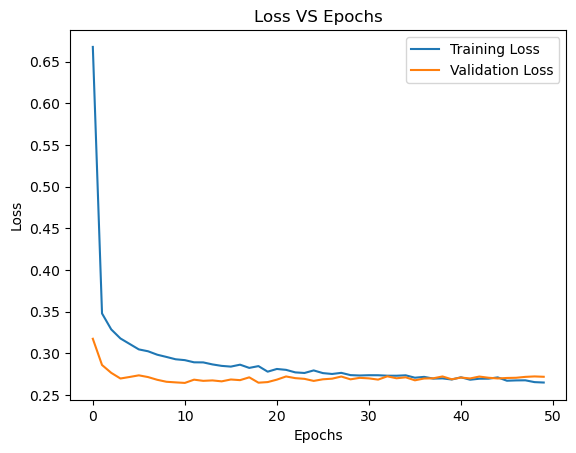

In [16]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss VS Epochs')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
test_predictions_prob = model.predict(test_images)
test_predictions = np.argmax(test_predictions_prob, axis=1)
f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='macro')

313/313 [==============================] - 1s 2ms/step


In [18]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"F1-Score: {f1:.4f}")


Test Accuracy: 0.9266
Test Loss: 0.2717
F1-Score: 0.9257


In [19]:
target_names = [str(i) for i in range(10)]
classification_rep = classification_report(np.argmax(test_labels, axis=1), test_predictions, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.92      0.90      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.90      0.89      0.89       892
           6       0.95      0.95      0.95       958
           7       0.94      0.91      0.93      1028
           8       0.87      0.90      0.88       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [20]:
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 965    0    1    2    0    5    4    2    1    0]
 [   0 1110    5    2    0    1    3    1   13    0]
 [   7    6  933   15    9    3   10    7   37    5]
 [   5    2   21  905    1   32    2   10   26    6]
 [   1    1    7    2  912    0    9    4    9   37]
 [   8    2    2   24    9  791   14    6   33    3]
 [  11    3   10    1    7   16  907    1    2    0]
 [   3    9   24    5    7    1    0  938    3   38]
 [   9    8    7   18    9   21    8    8  875   11]
 [  10    7    1    7   21    9    0   16    8  930]]


In [21]:
tf.saved_model.save(model, 'happymonk')

INFO:tensorflow:Assets written to: happymonk\assets


INFO:tensorflow:Assets written to: happymonk\assets
